# Übung zu: Kontextsensitive Systeme

In [3]:
#import libs 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

C:\Program Files\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Program Files\Python39\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Program Files\Python39\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
# read data & show first few lines
data1 = pd.read_csv("data_tableUp.csv", sep=';', decimal=".", index_col=2)
data2 = pd.read_csv("data_tableDown.csv", sep=';', decimal=".", index_col=2)
data3 = pd.read_csv("data_hands2.csv", sep=';', decimal=".", index_col=2)

# make index datetime format
data1.index = pd.to_datetime(data1.index, unit='ms')
data2.index = pd.to_datetime(data2.index, unit='ms')
data3.index = pd.to_datetime(data3.index, unit='ms')

data = pd.concat([data1, data2, data3])
data.head()

activity sampleId  alpha  beta  gamma    x    y    z
stamp                                                                       
2021-10-28 10:03:58.370  tableUp      Id1    4.5  -0.7    0.5  0.0  0.0  0.0
2021-10-28 10:03:58.381  tableUp      Id1    4.5  -0.7    0.5  0.0  0.0  0.0
2021-10-28 10:03:58.394  tableUp      Id1    4.5  -0.7    0.5  0.0  0.0  0.0
2021-10-28 10:03:58.423  tableUp      Id1    4.5  -0.7    0.5  0.0  0.0  0.0
2021-10-28 10:03:58.434  tableUp      Id1    4.5  -0.7    0.5  0.0  0.0  0.0

array([[<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'beta'}>],
       [<AxesSubplot:title={'center':'gamma'}>,
        <AxesSubplot:title={'center':'x'}>],
       [<AxesSubplot:title={'center':'y'}>,
        <AxesSubplot:title={'center':'z'}>]], dtype=object)

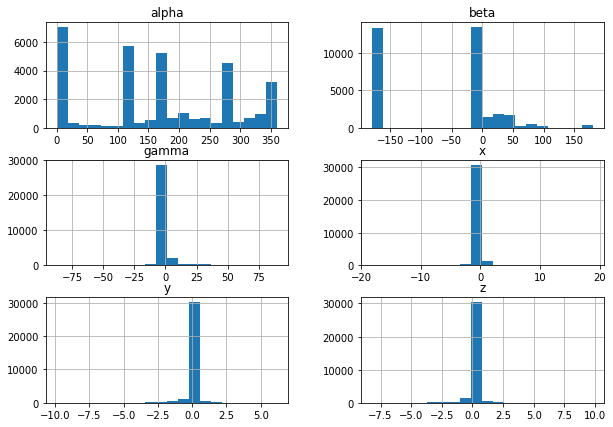

In [5]:
# show distribution of data
data.hist(figsize = (10,7), bins=20)

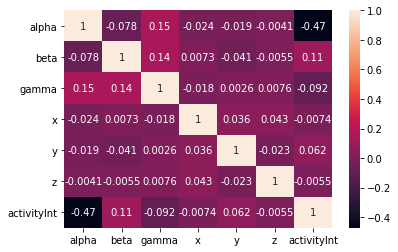

In [6]:
# show simple linear correlations

# for this we convert the activity column to a int value
data['activityInt'] = data['activity'].astype('category').cat.codes

corrMatrix = data.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

# drop the int column afterwards
data = data.drop('activityInt', 1)

In [7]:
# create windows

# choose features to calc
features = ['min', 'max', 'median', 'std']

# aggregate data with features
aggregated_frame = data.drop(['sampleId', 'activity'], axis=1).groupby(pd.Grouper(freq='1000ms')).aggregate(features).dropna()

# create a new dataframe with re-labled columns (& 1d columns)
aggregated_frame_1d = aggregated_frame.copy()
aggregated_frame_1d.columns = [col[0] + "_" + col[1] for col in aggregated_frame_1d.columns]

# create new dataframe with re-added old labels
aggregated_strings = data[['sampleId', 'activity']].groupby(pd.Grouper(freq='1000ms')).first()
aggregated_frame_1d_withLabels = aggregated_frame_1d.join(aggregated_strings)


In [8]:
aggregated_frame.head()

alpha                  beta                  gamma       \
                      min  max median  std  min  max median  std   min  max   
stamp                                                                         
2021-10-28 10:03:58   4.5  4.5    4.5  0.0 -0.7 -0.7   -0.7  0.0   0.5  0.5   
2021-10-28 10:03:59   4.5  4.5    4.5  0.0 -0.7 -0.7   -0.7  0.0   0.5  0.5   
2021-10-28 10:04:00   4.5  4.5    4.5  0.0 -0.7 -0.7   -0.7  0.0   0.5  0.5   
2021-10-28 10:04:01   4.5  4.5    4.5  0.0 -0.7 -0.7   -0.7  0.0   0.5  0.5   
2021-10-28 10:04:02   4.5  4.5    4.5  0.0 -0.7 -0.7   -0.7  0.0   0.5  0.5   

                     ...      x         y                     z              \
                     ... median  std  min  max median  std  min  max median   
stamp                ...                                                      
2021-10-28 10:03:58  ...    0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0    0.0   
2021-10-28 10:03:59  ...    0.0  0.0  0.0  0.0    0.0  0.0 -0.1  0.0    0.0   
2021-10-28 10:04:00  ...    0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0    0.0   
2021-10-28 10:04:01  ...    0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0    0.0   
2021-10-28 10:04:02  ...    0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0    0.0   

                               
                          std  
stamp                          
2021-10-28 10:03:58  0.000000  
2021-10-28 10:03:59  0.011043  
2021-10-28 10:04:00  0.000000  
2021-10-28 10:04:01  0.000000  
2021-10-28 10:04:02  0.000000  

[5 rows x 24 columns]

In [9]:
aggregated_frame_1d_withLabels.head()

alpha_min  alpha_max  alpha_median  alpha_std  beta_min  \
stamp                                                                          
2021-10-28 10:03:58        4.5        4.5           4.5        0.0      -0.7   
2021-10-28 10:03:59        4.5        4.5           4.5        0.0      -0.7   
2021-10-28 10:04:00        4.5        4.5           4.5        0.0      -0.7   
2021-10-28 10:04:01        4.5        4.5           4.5        0.0      -0.7   
2021-10-28 10:04:02        4.5        4.5           4.5        0.0      -0.7   

                     beta_max  beta_median  beta_std  gamma_min  gamma_max  \
stamp                                                                        
2021-10-28 10:03:58      -0.7         -0.7       0.0        0.5        0.5   
2021-10-28 10:03:59      -0.7         -0.7       0.0        0.5        0.5   
2021-10-28 10:04:00      -0.7         -0.7       0.0        0.5        0.5   
2021-10-28 10:04:01      -0.7         -0.7       0.0        0.5        0.5   
2021-10-28 10:04:02      -0.7         -0.7       0.0        0.5        0.5   

                     ...  y_min  y_max  y_median  y_std  z_min  z_max  \
stamp                ...                                                
2021-10-28 10:03:58  ...    0.0    0.0       0.0    0.0    0.0    0.0   
2021-10-28 10:03:59  ...    0.0    0.0       0.0    0.0   -0.1    0.0   
2021-10-28 10:04:00  ...    0.0    0.0       0.0    0.0    0.0    0.0   
2021-10-28 10:04:01  ...    0.0    0.0       0.0    0.0    0.0    0.0   
2021-10-28 10:04:02  ...    0.0    0.0       0.0    0.0    0.0    0.0   

                     z_median     z_std  sampleId  activity  
stamp                                                        
2021-10-28 10:03:58       0.0  0.000000       Id1   tableUp  
2021-10-28 10:03:59       0.0  0.011043       Id1   tableUp  
2021-10-28 10:04:00       0.0  0.000000       Id1   tableUp  
2021-10-28 10:04:01       0.0  0.000000       Id1   tableUp  
2021-10-28 10:04:02       0.0  0.000000       Id1   tableUp  

[5 rows x 26 columns]

<ipython-input-12-27d4dfa19188>:15: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(0.5)


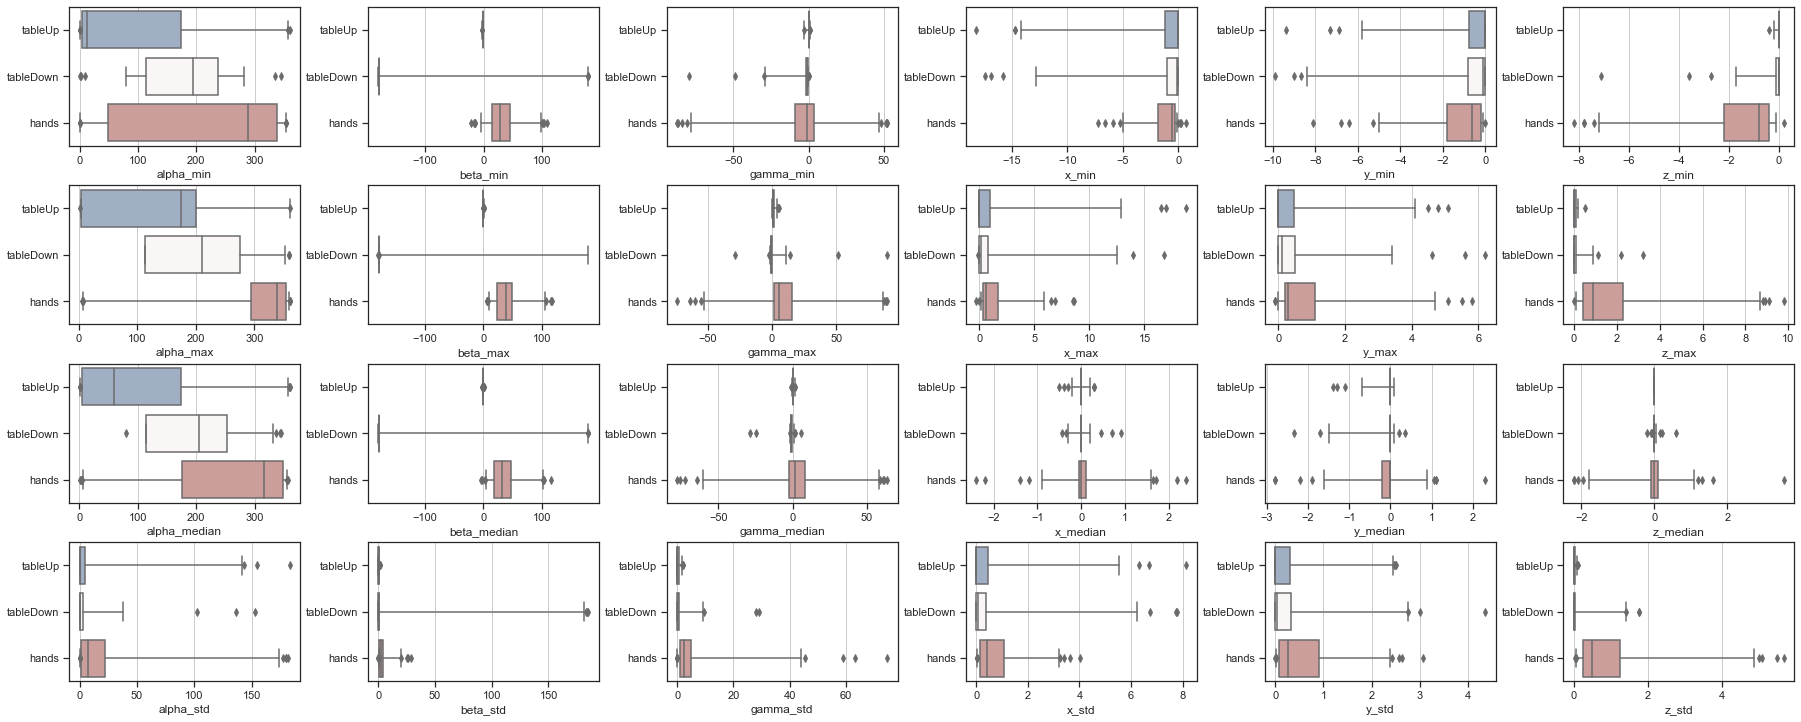

In [12]:
sn.set(style="ticks")
aggregate_columns = aggregated_frame_1d_withLabels.columns[:-2]
aggregates = ['min', 'max', 'median', 'std']
num_aggregates = len(aggregates)
f, ax = plt.subplots(num_aggregates, int(len(aggregate_columns)/num_aggregates),figsize=(25, 10))
for idx, column in enumerate(aggregate_columns):
    this_ax = ax[idx % num_aggregates,int(idx/num_aggregates)]
    
    # Plot the orbital period with horizontal boxes (outlier being outside 1%/99% of the data)
    sn.boxplot(x=column, y="activity", data=aggregated_frame_1d_withLabels, whis=[1, 99], palette="vlag", ax=this_ax)
    
    # Tweak the visual presentation
    this_ax.xaxis.grid(True)
    this_ax.set(ylabel="")
plt.tight_layout(0.5)


C:\Users\jonat\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


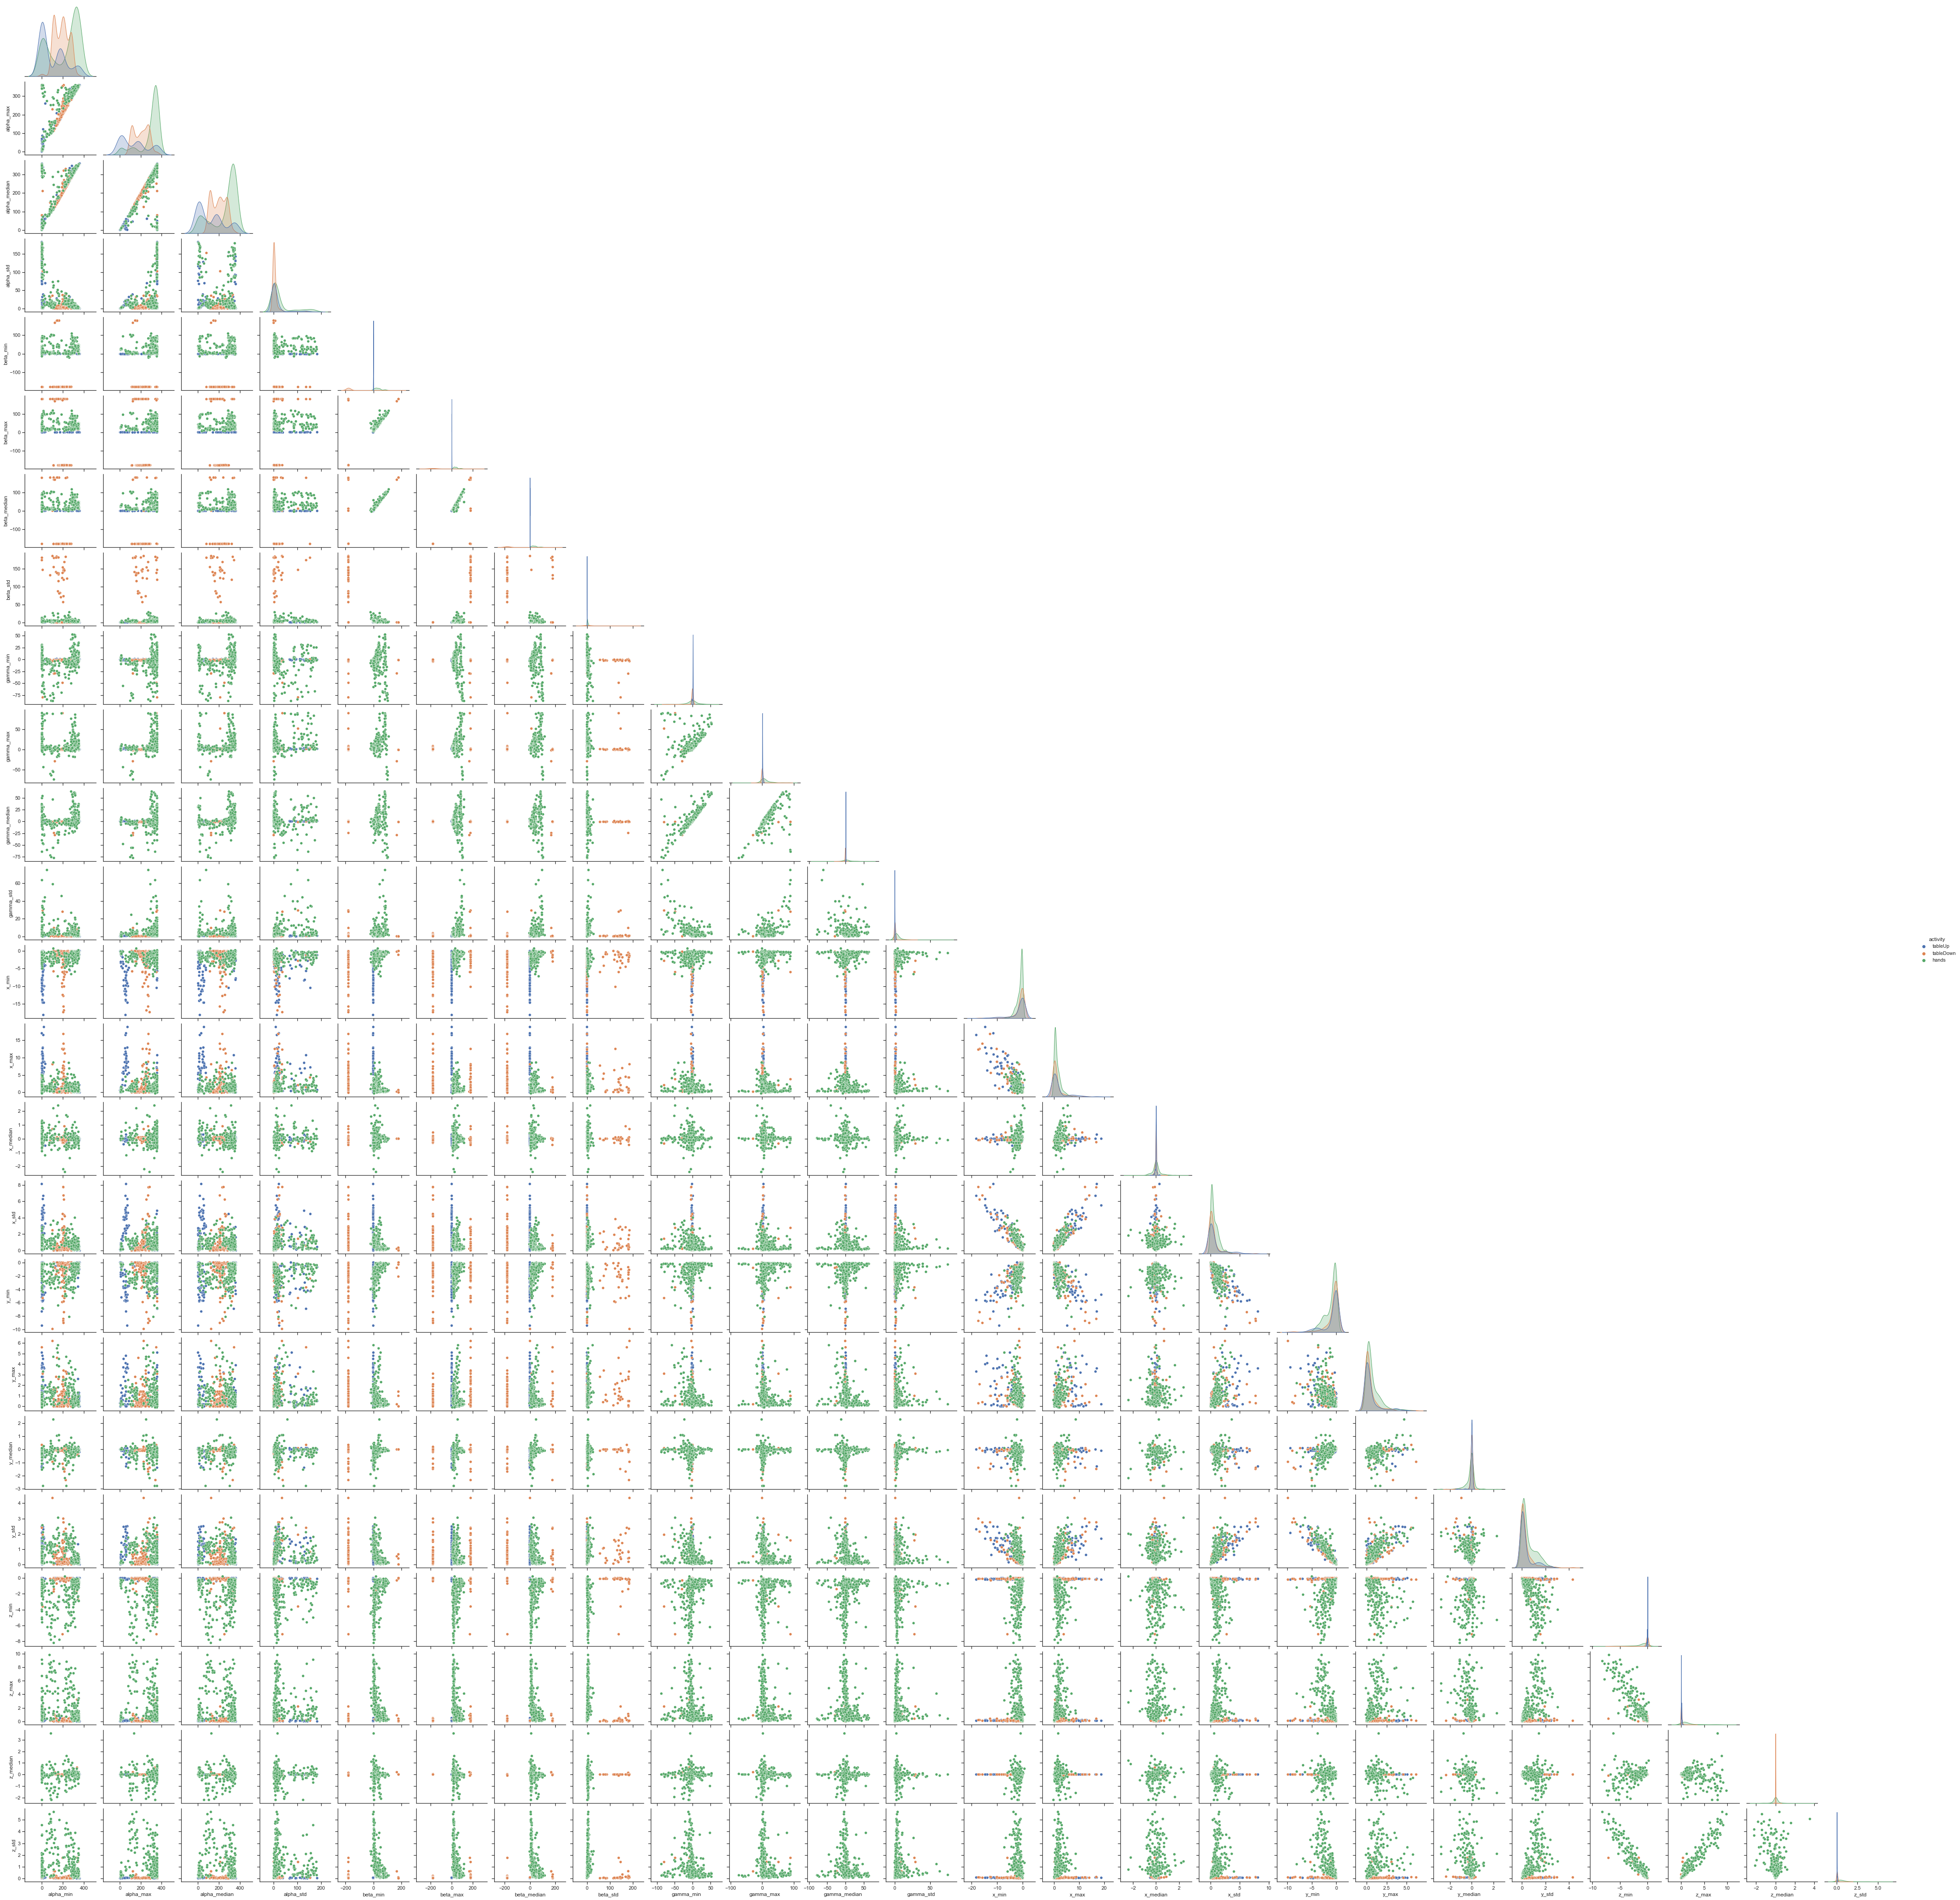

In [13]:
sn.pairplot(aggregated_frame_1d_withLabels, hue="activity", corner=True);